## Unsupervised Learning Natural Language Processing Capstone 
In this unsupervised learning capstone, I used 10 novels from 5 authors from the NLTK Gutenberg corpus and [Project Gutenberg](https://www.gutenberg.org/) (which were manually added to the corpus). 


Steps and techniques:
-  Pick a set of texts. I used 10 different texts from different authors on Project Gutenberg.
-  Perform standard data cleaning on the text using things such as spacy and stopwords.
-  Break the data in to two groups, the training group (75%) and the holdout group(25%).
-  Perform various clustering methods, decide which technique best represents the data, and explain your reasoning.
-  Perform some unsupervised feature generation and selection using techniques such as Latent Semantics Analysis (LSA), tf-idf term-document matrix, word2vec packaging, Latent Dirichlet Allocation (LDA) and Non-negative Matrix Factorization (NMF). 
-  Perform the clustering techniques on the holdout group and document the performance for changes, stability, and consistencies in comparison to the original model.
- Summarize all findings including visuals in a separate but linked document.
- Link to write-up: https://docs.google.com/document/d/1M7Ps1RfgudP8AfGlO6JXvav7QfrYjCdlIgjJgUDxfwY/edit?usp=sharing

##### Imported Modules Cell

In [2]:
import numpy as np
import pandas as pd
import scipy
import spacy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re, os, sys
import requests
import pickle
import string
import en_core_web_sm
import urllib.request

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

#sklearn modules
import sklearn
from sklearn import ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer
from sklearn import ensemble
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer, normalize
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.cluster import MeanShift, estimate_bandwidth, KMeans
from sklearn.cluster import SpectralClustering, AgglomerativeClustering, AffinityPropagation 
from sklearn.datasets.samples_generator import make_blobs
from sklearn import metrics
from sklearn.metrics import silhouette_score
import itertools
from itertools import cycle
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import cosine_similarity


#nltk modules
import nltk
from nltk.corpus import gutenberg
from nltk.stem import WordNetLemmatizer 










#### Novels
- The Ivory Child by Henry Rider Haggard
- Eric Brighteyes by Henry Rider Haggard
- The Sea-Hawk by Rafael Sabatini
- Scaramouche: A Romance Of The French Revolution by Rafael Sabatini
- Moby Dick by Herman Melville
- A Romance Of The South Seas by Herman Melville
- Tarzan The Terrible by Edgar Rice Burroughs
- Pellucidar by Edgar Rice Burroughs
- Adventures Of Huckleberry Finn by Mark Twain
- The Adventures Of Tom Sawyer by Mark Twain




In [3]:
# #checking sizes (explained below)
# print( "ivory:",len(gutenberg.raw('burroughs-pellucidar.txt')  ))
# print('bright:', len(gutenberg.raw('haggard-brighteyes.txt') ))
# print('seahawk:', len(gutenberg.raw('sabatini-seahawk.txt') ))
# print('scar', len(gutenberg.raw('sabatini-scaramouche.txt') ))
# print('moby', len(gutenberg.raw('melville-moby_dick.txt') ))
# print('southsea', len(gutenberg.raw('melville-southsea.txt') ))
# print('tarzan', len(gutenberg.raw('burroughs-tarzan.txt')))
# print('pell', len(gutenberg.raw('burroughs-pellucidar.txt') ))
# print('huck', len(gutenberg.raw('twain-huckleberry.txt') ))
# print('sawyer', len(gutenberg.raw('twain-sawyer.txt')))

In [4]:
#load, encode, decode, and reduce size
#The sizes were reduced to prevent crashing. 
#At full size, certain algorithms either created a memory or crashed the computer.


#The Ivory Child By Haggard
ivory=gutenberg.raw('haggard-ivory.txt').encode('ascii', 'replace').decode('ascii', 'replace')
ivory = ivory[:310000]

#Eric Brighteyes by Haggard
bright = gutenberg.raw('haggard-brighteyes.txt').encode('ascii', 'replace').decode('ascii', 'replace')
bright = bright[:310000]

#The Sea-Hawk by Sabatini
seahawk = gutenberg.raw('sabatini-seahawk.txt').encode('ascii', 'replace').decode('ascii', 'replace')
seahawk = seahawk[:310000]

#Scaramouche: A Romance Of The French Revolution by Sabatini
scar = gutenberg.raw('sabatini-scaramouche.txt').encode('ascii', 'replace').decode('ascii', 'replace')
scar = scar[:310000]

#Moby Dick by Melville
moby = gutenberg.raw('melville-moby_dick.txt').encode('ascii', 'replace').decode('ascii', 'replace') 
moby = moby[:310000]

#A Romance Of The South Seas by Melville
southsea = gutenberg.raw('melville-southsea.txt').encode('ascii', 'replace').decode('ascii', 'replace') 
southsea = southsea[:310000]

#Tarzan The Terrible by Burroughs
tarzan = gutenberg.raw('burroughs-tarzan.txt').encode('ascii', 'replace').decode('ascii', 'replace') 
tarzan = tarzan[:310000]


#Pellucidar by Burroughs
pell = gutenberg.raw('burroughs-pellucidar.txt').encode('ascii', 'replace').decode('ascii', 'replace') 
pell = pell[:310000]

#Adventures Of Huckleberry Finn by Twain
huck = gutenberg.raw('twain-huckleberry.txt').encode('ascii', 'replace').decode('ascii', 'replace') 
huck = huck[:310000]

#The Adventures Of Tom Sawyer by Twain
saw = gutenberg.raw('twain-sawyer.txt').encode('ascii', 'replace').decode('ascii', 'replace')
saw = saw[:310000]

In [6]:
#Load the data/novels/text

data = {'book' :["The Ivory Child", "Eric Brighteyes",
                 "The Sea-Hawk", "Scaramouche: A Romance Of The French Revolution",
                 "Moby Dick", "A Romance Of The South Seas",
                 "Tarzan The Terrible", "Pellucidar",
                 "Adventures Of Huckleberry Finn", "The Adventures Of Tom Sawyer"],
        'author' :['Henry Rider Haggard', 'Henry Rider Haggard', 
                   'Rafael Sabatini', 'Rafael Sabatini', 
                   'Herman Melville', 'Herman Melville', 
                   'Edgar Rice Burroughs', 'Edgar Rice Burroughs',
                   'Mark Twain', 'Mark Twain'],
       'novel':[ivory, bright, seahawk, scar, moby, southsea, tarzan, pell, huck, saw],
       'genre' :['Adventure', 'Adventure',
                 'Adventure', 'Adventure',
                 'Adventure', 'Adventure',
                 'Adventure', 'Adventure', 
                 'Adventure', 'Adventure']}

In [7]:
#place the data in a dataframe
books = pd.DataFrame(data, columns= ['book','author','novel','genre'])
books.head(10)

,book,author,novel,genre
0,The Ivory Child,Henry Rider Haggard,???THE IVORY CHILD\r\n\r\nby H. Rider Haggard\...,Adventure
1,Eric Brighteyes,Henry Rider Haggard,???\r\nERIC BRIGHTEYES\r\n\r\nby H. Rider Hagg...,Adventure
2,The Sea-Hawk,Rafael Sabatini,???THE SEA-HAWK\r\n\r\n\r\nBy Rafael Sabatini\...,Adventure
3,Scaramouche: A Romance Of The French Revolution,Rafael Sabatini,???\r\nSCARAMOUCHE\r\n\r\nA ROMANCE OF THE FRE...,Adventure
4,Moby Dick,Herman Melville,???[Moby Dick by Herman Melville 1851]\r\n\r\n...,Adventure
5,A Romance Of The South Seas,Herman Melville,???A ROMANCE OF THE SOUTH SEAS\r\n\r\n\r\nBy H...,Adventure
6,Tarzan The Terrible,Edgar Rice Burroughs,???Tarzan the Terrible\r\n\r\n\r\nBy\r\n\r\nEd...,Adventure
7,Pellucidar,Edgar Rice Burroughs,"???The Project Gutenberg EBook of Pellucidar, ...",Adventure
8,Adventures Of Huckleberry Finn,Mark Twain,???ADVENTURES\r\n\r\nOF\r\n\r\nHUCKLEBERRY FIN...,Adventure
9,The Adventures Of Tom Sawyer,Mark Twain,???THE ADVENTURES OF TOM SAWYER\r\n\r\nBy Mark...,Adventure


## Data Cleaning

In [8]:
# Utility function for standard text cleaning.
def text_cleaner(text):
    text = re.sub("project gutenberg", "0", text)
    text = re.sub("gutenberg", "0", text)
    text = re.sub("project",  "0", text)
 
    text = re.sub(r'--',' ',text)
    text = re.sub(r'_',' ',text)
    text = re.sub("[\[].*[\]]", "", text)
    
    #get rid of chapter titles
    text = re.sub(r'Chapter \d+','',text)
    text = re.sub(r'CHAPTER \d+', '', text)
    
    #change Mr. Mrs. Ms. St. etc. to another value for future sentence creation
    text = re.sub('Mrs\. ', 'Mrs0 ',text)
    text = re.sub('Mr\. ', 'Mr0 ', text)
    text = re.sub('St\. ', 'St0 ',text)
    text = re.sub('Ms\. ', 'Ms0 ',text)

    #get rid of \n line breaks
    text = re.sub("\\n\\n.*?\\n\\n", '', text)
    
   #get rid of extra spacing and a random set of characters I saw
    text = re.sub("  ", " ",text)
    text = re.sub('[ï»¿]', '',text)
   
    
    text = ' '.join(text.split())
    return text
round0= lambda x: text_cleaner(x)

In [9]:
# Let's take a look at the updated text
books['novel'] = books.novel.apply(round0)

books.head(10)

,book,author,novel,genre
0,The Ivory Child,Henry Rider Haggard,???THE IVORY CHILD by H. Rider Haggard CHAPTER...,Adventure
1,Eric Brighteyes,Henry Rider Haggard,??? ERIC BRIGHTEYES by H. Rider Haggard DEDICA...,Adventure
2,The Sea-Hawk,Rafael Sabatini,???THE SEA-HAWK By Rafael Sabatini NOTE Lord H...,Adventure
3,Scaramouche: A Romance Of The French Revolution,Rafael Sabatini,??? SCARAMOUCHE A ROMANCE OF THE FRENCH REVOLU...,Adventure
4,Moby Dick,Herman Melville,??? ETYMOLOGY. (Supplied by a Late Consumptive...,Adventure
5,A Romance Of The South Seas,Herman Melville,???A ROMANCE OF THE SOUTH SEAS By Herman Melvi...,Adventure
6,Tarzan The Terrible,Edgar Rice Burroughs,???Tarzan the Terrible By Edgar Rice Burroughs...,Adventure
7,Pellucidar,Edgar Rice Burroughs,"???The Project Gutenberg EBook of Pellucidar, ...",Adventure
8,Adventures Of Huckleberry Finn,Mark Twain,???ADVENTURES OF HUCKLEBERRY FINN (Tom Sawyer'...,Adventure
9,The Adventures Of Tom Sawyer,Mark Twain,???THE ADVENTURES OF TOM SAWYER By Mark Twain ...,Adventure


In [10]:
#turn text into sentences
sentences = []
for row in books.itertuples():
    for sentence in row[3].split('.'):
        if sentence != '':
            sentences.append((row[1],row[2], sentence, row[4] ))
books = pd.DataFrame(sentences, columns=['book', 'author', 'sentence', 'genre'])

In [11]:
books.head()

,book,author,sentence,genre
0,The Ivory Child,Henry Rider Haggard,???THE IVORY CHILD by H,Adventure
1,The Ivory Child,Henry Rider Haggard,Rider Haggard CHAPTER I ALLAN GIVES A SHOOTIN...,Adventure
2,The Ivory Child,Henry Rider Haggard,Amongst many other things it tells of the war...,Adventure
3,The Ivory Child,Henry Rider Haggard,Often since then I have wondered if this crea...,Adventure
4,The Ivory Child,Henry Rider Haggard,"It seems improbable, even impossible, but the...",Adventure


In [12]:
# Utility function for standard text cleaning.
def text_cleaner(text):
  #change Mr. Mrs. Ms. St. etc. to another value for future sentence creation
    text = re.sub('Mrs0 ', 'Mrs ',text)
    text = re.sub('Mr0 ', 'Mr ', text)
    text = re.sub('St0 ', 'St ',text)
    text = re.sub('Ms0 ', 'Ms ',text)
   

    #get rid of some punctuation and brackets
    text = re.sub("/.*? ", " ",text)
    text = re.sub("[\[].,*?[\]]", "", text)
    text = re.sub("\\./\\.", "",text)
    text = re.sub("``", "",text)
    text = re.sub("''", "",text)
    text = re.sub("  ", " ",text)
    text = re.sub("./", " ",text)
    
    #digits
   
   

    
    #get rid of extra spacing and a random set of characters I saw
    text = re.sub("  ", " ",text)
  
    text = re.sub("'s", " ",text)
    
    text = ' '.join(text.split())
    return text
round1= lambda x: text_cleaner(x)

In [13]:
# Let's take a look at the updated text

books['sentence'] = books.sentence.apply(round1)
books.head(5)

,book,author,sentence,genre
0,The Ivory Child,Henry Rider Haggard,???THE IVORY CHILD by H,Adventure
1,The Ivory Child,Henry Rider Haggard,Rider Haggard CHAPTER I ALLAN GIVES A SHOOTING...,Adventure
2,The Ivory Child,Henry Rider Haggard,Amongst many other things it tells of the war ...,Adventure
3,The Ivory Child,Henry Rider Haggard,Often since then I have wondered if this creat...,Adventure
4,The Ivory Child,Henry Rider Haggard,"It seems improbable, even impossible, but the ...",Adventure


In [14]:
# Utility function for standard text cleaning.
def text_cleaner(text):
    
    # get rid of all the XML markup
    text = re.sub('<.*?>','',text)
    
    #get rid of the "ENDOFARTICLE." text
    text = re.sub('ENDOFARTICLE.','',text)
    text = re.sub('\?','', text)
    text = re.sub('â', '', text)
    text = ' '.join(text.split())
    return text
round2= lambda x: text_cleaner(x)

In [15]:
# Let's take a look at the updated text
books['sentence'] = books.sentence.apply(round2)
books.head(10)

,book,author,sentence,genre
0,The Ivory Child,Henry Rider Haggard,THE IVORY CHILD by H,Adventure
1,The Ivory Child,Henry Rider Haggard,Rider Haggard CHAPTER I ALLAN GIVES A SHOOTING...,Adventure
2,The Ivory Child,Henry Rider Haggard,Amongst many other things it tells of the war ...,Adventure
3,The Ivory Child,Henry Rider Haggard,Often since then I have wondered if this creat...,Adventure
4,The Ivory Child,Henry Rider Haggard,"It seems improbable, even impossible, but the ...",Adventure
5,The Ivory Child,Henry Rider Haggard,Also he can form his opinion as to the religio...,Adventure
6,The Ivory Child,Henry Rider Haggard,Of this magic I will make only one remark: If ...,Adventure
7,The Ivory Child,Henry Rider Haggard,"To take a single instance, Hart and Mart were ...",Adventure
8,The Ivory Child,Henry Rider Haggard,Yet in the end it was Hans who killed him,Adventure
9,The Ivory Child,Henry Rider Haggard,Jana nearly killed me! Now to my tale,Adventure


In [16]:
#make novel lowercase
books['sentence']= books['sentence'].str.lower()
books.tail(10)

,book,author,sentence,genre
25342,The Adventures Of Tom Sawyer,Mark Twain,then it occurred to him that the great adventu...,Adventure
25343,The Adventures Of Tom Sawyer,Mark Twain,he had never seen as much as fifty dollars in ...,Adventure
25344,The Adventures Of Tom Sawyer,Mark Twain,he never had supposed for a moment that so lar...,Adventure
25345,The Adventures Of Tom Sawyer,Mark Twain,if his notions of hidden treasure had been ana...,Adventure
25346,The Adventures Of Tom Sawyer,Mark Twain,but the incidents of his adventure grew sensib...,Adventure
25347,The Adventures Of Tom Sawyer,Mark Twain,this uncertainty must be swept away,Adventure
25348,The Adventures Of Tom Sawyer,Mark Twain,he would snatch a hurried breakfast and go and...,Adventure
25349,The Adventures Of Tom Sawyer,Mark Twain,"huck was sitting on the gunwale of a flatboat,...",Adventure
25350,The Adventures Of Tom Sawyer,Mark Twain,tom concluded to let huck lead up to the subject,Adventure
25351,The Adventures Of Tom Sawyer,Mark Twain,"if he did not do it, then the adventure would ...",Adventure


In [17]:
import pickle
books.to_pickle("books.pkl")

## Train, Test, and Holdout Groups

In [14]:
train_test, holdout= train_test_split(books, test_size=0.25, random_state=45)
train, test= train_test_split(train_test, test_size=0.30, random_state=45)

print('Train:', train.shape[0])
print('Test:', test.shape[0]) 
print('Holdout:', holdout.shape[0])

Train: 13309
Test: 5705
Holdout: 6338


## TF-IDF

In [15]:
vectorizer = TfidfVectorizer(max_df=0.6, min_df=2,
                            lowercase=True, use_idf=True,
                            norm='l2', stop_words='english',
                            smooth_idf=True)

# Applying the vectorizer to sentence
TfIdf = vectorizer.fit_transform(train['sentence'])


## LSA

The percentage of total variance in the dataset explained by each component from LSA.
 [0.00377274 0.0030842  0.00312903 0.00288414 0.0027189 ]
Percent variance captured by all components: 26.169901120712435


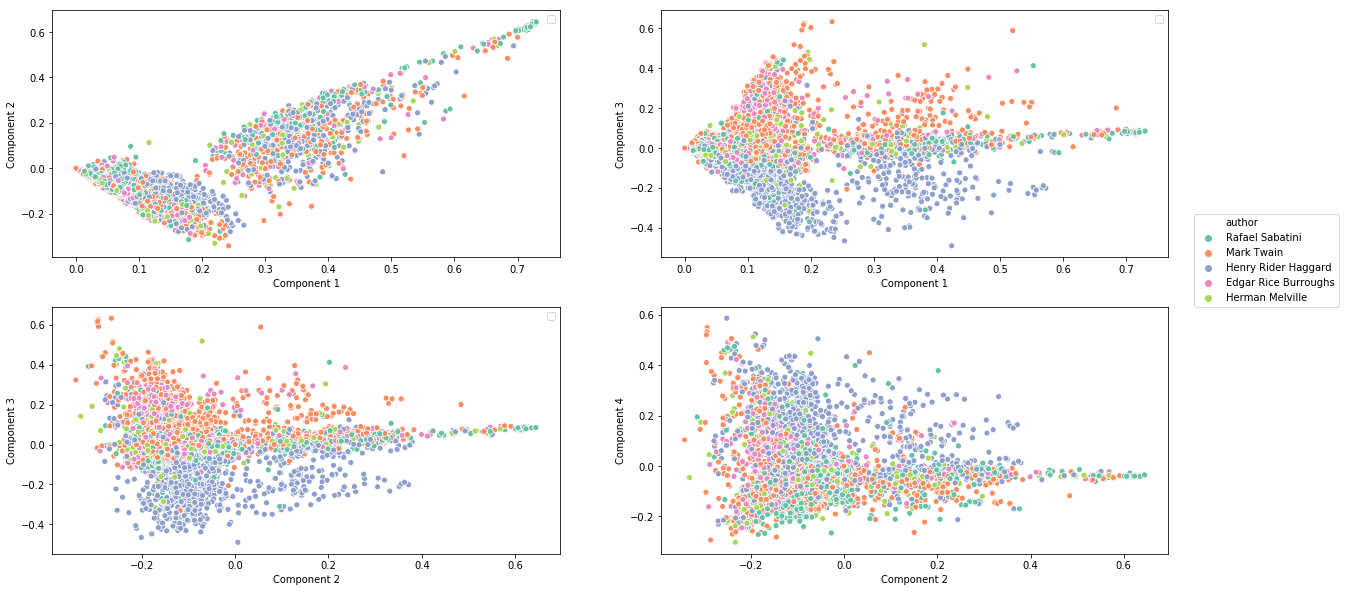

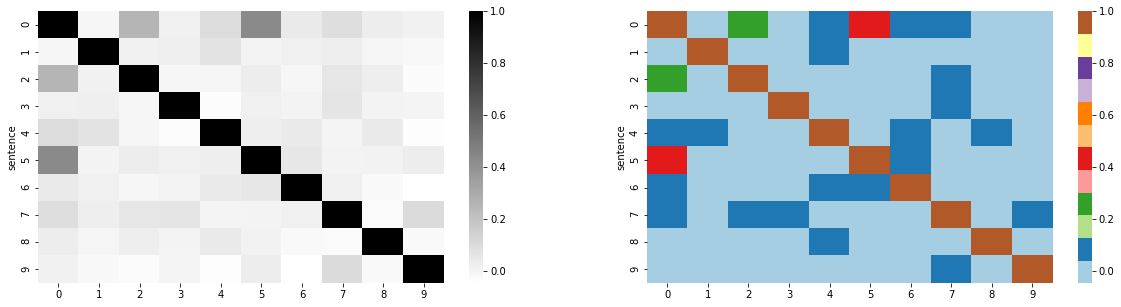

Key:
0 he was satisfied, and fell into a gentle healing sleep, whilst, on the decks above, his followers rendered thanks to allah the pitying the pitiful, the master of the day of judgment, who alone is all-wise, all-knowing
1 he can say he never seen us together, and it 'll be the truth
2 but will you and miss manners come to dine and sleep to-morrow evening i should like to introduce your future wife to my future wife, he added, colouring a little
3 a god, ko-tan reasoned, could experience all the pleasure without the headache, but for the immediate present he must think of the necessary dignities and honors to be accorded his immortal guest
4 we had stuck the ends of some of the saplings into the ground in the building of our shelter, first stripping the leaves and branches from them, and when we awoke we found that many of them had thrust forth sprouts
5 master godolphin, i cry shame upon you, ex-claimed the parson
6 she said she had to have things handy to throw at them when she w

In [16]:
#Our SVD data reducer. Features are reduced down to 250.
svd = TruncatedSVD(250, random_state=45)
lsa = make_pipeline(svd, Normalizer(copy=False))
# Run SVD on the training data, then project the training data.
LSA = lsa.fit_transform(TfIdf)

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print(
    'The percentage of total variance in the dataset explained by each',
    'component from LSA.\n',
    variance_explained[:5]
)
print("Percent variance captured by all components:",total_variance*100)

# Compare the sklearn solution to ours 

plt.figure(figsize=(20,10))
for i, c in enumerate([(0,1), (0,2), (1,2), (1,3)]): 
    plt.subplot(2,2,i+1)
    sns.scatterplot(x=LSA[:, c[0]], y=LSA[:, c[1]], hue=train['author'],
                    palette="Set2")
    plt.legend('')
    plt.xlabel('Component ' + str(c[0]+1))
    plt.ylabel('Component ' + str(c[1]+1))
plt.legend(loc = (1.05, 1))
plt.show()



# Compute document similarity using LSA component
similarity = cosine_similarity(LSA)
#Only taking the first 10 sentences
sim_matrix=pd.DataFrame(similarity,index=train['sentence']).iloc[0:10,0:10]
#Making a plot
plt.figure(figsize=(20,5))
plt.subplot(121)
ax = sns.heatmap(sim_matrix,yticklabels=range(10), cmap='binary')
plt.subplot(122)
ax = sns.heatmap(sim_matrix,yticklabels=range(10), cmap='Paired')
plt.show()

#Generating a key for the plot.
print('Key:')
for i in range(10):
    print(i,sim_matrix.index[i])

#### LSA Summary

Increasing the number of features through LSA did improve the variance however, it slowed down all of the algorithms. This includes the LSA SVD data reducer and the commands below that use LSA to train_test split. Also the increased size  caused morw overfitting in Logistic Regression with the training and test scores differing by 5 points.

In [1]:
# Transform test set 
test_tfidf = vectorizer.transform(test['sentence'])
LSA_test = lsa.transform(test_tfidf)

# model vars
x_train = LSA
x_test = LSA_test
y_train = train['author']
y_test = test['author']

NameError: name 'vectorizer' is not defined

## Supervised Learning

### Logistic Regression

In [18]:
lr = LogisticRegression(n_jobs=2, multi_class='ovr',
                        solver='newton-cg',random_state=45)
lr.fit(x_train, y_train)
print('cross-validation:', cross_val_score(lr, x_train, y_train, cv=5))
print('Training set score:', lr.score(x_train, y_train))
print('Test set score:', lr.score(x_test, y_test))
pd.crosstab(y_test, lr.predict(x_test))



cross-validation: [0.6943297  0.6826887  0.66917011 0.67768595 0.67569601]
Training set score: 0.7072657600120219
Test set score: 0.6939526730937774


col_0,Edgar Rice Burroughs,Henry Rider Haggard,Herman Melville,Mark Twain,Rafael Sabatini
author,,,,,
Edgar Rice Burroughs,730,62,49,78,108
Henry Rider Haggard,68,758,61,87,137
Herman Melville,84,57,462,95,128
Mark Twain,45,56,58,963,144
Rafael Sabatini,103,118,99,109,1046


### Random Forest

In [ ]:

rfc = ensemble.RandomForestClassifier(n_estimators=100, max_depth=10, 
                                      max_features='auto',random_state=45)
rfc.fit(x_train, y_train)

print('cross-validation:', cross_val_score(rfc, x_train, y_train, cv=5))
print('Training set score:', rfc.score(x_train, y_train))
print('Test set score:', rfc.score(x_test, y_test))



## Unsupervised Learning Methods

### K-Means

In [ ]:
# Split the data to test for consistent clustering
lsa1, lsa3= train_test_split(LSA, test_size=0.50, random_state=45)
lsa1, lsa2= train_test_split(LSA, test_size=0.50, random_state=45)
lsa3, lsa4= train_test_split(LSA, test_size=0.50, random_state=45)

plt.figure(figsize=(20,20))
# Calculate predicted values.
preds = {}
models = {}
clusters = (2,5,10)

for row, data in enumerate([lsa1, lsa2, lsa3, lsa4, LSA]):
    
    # Generate cluster predictions and store them for clusters 2 to 10.
    for col, nclust in  enumerate(clusters):
        models[row, nclust] = KMeans(n_clusters=nclust, random_state=42).fit(data)
        preds[row, nclust] = models[row, nclust].predict(data)
        
        if row != 4:
            plt.subplot(4, 4, row*4 + (col+1))
            plt.scatter(data[:, 0], data[:, 1], c=preds[row, nclust])
            plt.title('Subset ' + str(row + 1) +' with ' + str(nclust) +' clusters')
            plt.xlabel('Component 1')
            plt.ylabel('Component 2')
        

In [ ]:
# Function to evaluate the clustering
def cluster_eval(clusters, preds, models, n):
    for i in clusters: 
        pred = preds[4,i]
        model = models[4,i]
        labels = model.labels_
        print('Adjusted Rand index for', i, 'clusters:', 
              round(metrics.adjusted_rand_score(train['author'], pred),5))
        print('The silhouette coefficient for %d clusters: %.4f \n' % (i, metrics.silhouette_score(LSA, labels, metric='euclidean')))

    return(pd.crosstab(train['author'], preds[4,n]).T)

cluster_eval(clusters, preds, models, 5)

### Agglomerative clustering

In [ ]:
plt.figure(figsize=(20,20))
# Calculate predicted values.
preds_2 = {}
models_2 = {}
clusters = (2,5,10)
for row, data in enumerate([lsa1, lsa2, lsa3, lsa4, LSA]):
    
    # Generate cluster predictions and store them for clusters 2 to 4.
    for col, nclust in  enumerate(clusters):
        models_2[row, nclust] = AgglomerativeClustering(n_clusters=nclust).fit(data)
        preds_2[row, nclust] = AgglomerativeClustering(n_clusters=nclust).fit_predict(data)
        
        if row != 4:
            plt.subplot(4, 4, row*4 + (col+1))
            plt.scatter(data[:, 0], data[:, 1], c=preds_2[row, nclust])
            plt.title('Subset ' + str(row + 1) +' with ' + str(nclust) +' clusters')
            plt.xlabel('Component 1')
            plt.ylabel('Component 2')
        
plt.show()

In [ ]:
cluster_eval(clusters, preds_2, models_2, 5)

In [ ]:
# # Declare the model and fit it in one statement.
# # Note that you can provide arguments to the model, but we didn't.
# from sklearn.cluster import AffinityPropagation
# af = AffinityPropagation().fit(x_train)
# print('Done')

# # Pull the number of clusters and cluster assignments for each data point.
# cluster_centers_indices = af.cluster_centers_indices_
# n_clusters_ = len(cluster_centers_indices)
# aflabels = af.labels_

# print('Estimated number of clusters: {}'.format(n_clusters_))

## Holdout Group

### Logistic Regression

In [ ]:
holdout_tfidf = vectorizer.transform(holdout['sentence'])
LSA_holdout = lsa.transform(holdout_tfidf)

# model vars
x_holdout = LSA_holdout
y_holdout = holdout['author']

print('Holdout set score:', lr.score(x_holdout, y_holdout))
print('Test set score from earlier:', lr.score(x_test, y_test))
pd.crosstab(y_holdout, lr.predict(x_holdout))

### K-Means

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(121)
hpreds5 = KMeans(n_clusters=5, random_state=42).fit_predict(LSA_holdout)
plt.scatter(LSA_holdout[:, 0], LSA_holdout[:, 1], c=preds)
plt.title('Kmeans of holdout group with 5 clusters')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

plt.subplot(122)
hpreds10 = KMeans(n_clusters=10, random_state=42).fit_predict(LSA_holdout)
plt.scatter(LSA_holdout[:, 0], LSA_holdout[:, 1], c=hpreds)
plt.title('Kmeans of holdout group with 10 clusters')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
        
plt.show()

In [ ]:
print("K-Means on Original Set", cluster_eval(clusters, preds, models, 5))
print("\n")

print("Holdout Silhouette w 5 clusters", silhouette_score(x_holdout, hpreds5))
print("\n")
print("Holdout Silhouette w 10 clusters", silhouette_score(x_holdout, hpreds10))
